[Sebastian Raschka](http://sebastianraschka.com), 2016

https://github.com/rasbt/python-machine-learning-book

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy

Sebastian Raschka 
last updated: 2016-06-05 

CPython 3.5.1
IPython 4.2.0

matplotlib 1.5.1
numpy 1.11.0
scipy 0.17.0


In [2]:
# to install watermark just uncomment the following line:
#%install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py

In [3]:
%matplotlib inline

# Bonus Material - Softmax Regression

*Softmax Regression* (synonyms: *Multinomial Logistic*, *Maximum Entropy Classifier*, or just *Multi-class Logistic Regression*) is a generalization of logistic regression that we can use for multi-class classification (under the assumption that the classes are  mutually exclusive). In contrast, we use the (standard) *Logistic Regression* model in binary classification tasks.

Below is a schematic of a *Logistic Regression* model that we discussed in Chapter 3.

![](./images/logistic_regression_schematic_2.png)

In *Softmax Regression* (SMR), we replace the sigmoid logistic function by the so-called *softmax* function $\phi_{softmax}(\cdot)$.

$$P(y=j \mid z^{(i)}) = \phi_{softmax}(z^{(i)}) = \frac{e^{z^{(i)}}}{\sum_{j=0}^{k} e^{z_{k}^{(i)}}},$$

where we define the net input *z* as 

$$z = w_1x_1 + ... + w_mx_m  + b= \sum_{l=0}^{m} w_l x_l + b= \mathbf{w}^T\mathbf{x} + b.$$ 

(**w** is the weight vector, $\mathbf{x}$ is the feature vector of 1 training sample, and $b$ is the bias unit.)   
Now, this softmax function computes the probability that this training sample $\mathbf{x}^{(i)}$ belongs to class $j$ given the weight and net input $z^{(i)}$. So, we compute the probability $p(y = j \mid \mathbf{x^{(i)}; w}_j)$ for each class label in  $j = 1, \ldots, k.$. Note the normalization term in the denominator which causes these class probabilities to sum up to one.

![](./images/softmax_schematic_1.png)

To illustrate the concept of softmax, let us walk through a concrete example. Let's assume we have a training set consisting of 4 samples from 3 different classes (0, 1, and 2)

- $x_0 \rightarrow \text{class }0$
- $x_1 \rightarrow \text{class }1$
- $x_2 \rightarrow \text{class }2$
- $x_3 \rightarrow \text{class }2$

In [4]:
import numpy as np
y = np.array([0, 1, 2, 2])

First, we want to encode the class labels into a format that we can more easily work with; we apply one-hot encoding:

In [5]:
y_enc = (np.arange(np.max(y) + 1) == y[:, None]).astype(float)
print('one-hot encoding:\n', y_enc)

one-hot encoding:
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


A sample that belongs to class 0 (the first row) has a 1 in the first cell, a sample that belongs to class 2 has a 1 in the second cell of its row, and so forth.

Next, let us define the feature matrix of our 4 training samples. Here, we assume that our dataset consists of 2 features; thus, we create a 4x2 dimensional matrix of our samples and features.
Similarly, we create a 2x3 dimensional weight matrix (one row per feature and one column for each class).

In [6]:
X = np.array([[0.1, 0.5],
              [1.1, 2.3],
              [-1.1, -2.3],
              [-1.5, -2.5]])

W = np.array([[0.1, 0.2, 0.3],
              [0.1, 0.2, 0.3]])

bias = np.array([0.01, 0.1, 0.1])

print('Inputs X:\n', X)
print('\nWeights W:\n', W)
print('\nbias:\n', bias)

Inputs X:
 [[ 0.1  0.5]
 [ 1.1  2.3]
 [-1.1 -2.3]
 [-1.5 -2.5]]

Weights W:
 [[ 0.1  0.2  0.3]
 [ 0.1  0.2  0.3]]

bias:
 [ 0.01  0.1   0.1 ]


To compute the net input, we multiply the 4x2 matrix feature matrix `X` with the 2x3 (n_features x n_classes) weight matrix `W`, which yields a 4x3 output matrix (n_samples x n_classes) to which we then add the bias unit: 

$$\mathbf{Z} = \mathbf{X}\mathbf{W} + \mathbf{b}.$$

In [7]:
X = np.array([[0.1, 0.5],
              [1.1, 2.3],
              [-1.1, -2.3],
              [-1.5, -2.5]])

W = np.array([[0.1, 0.2, 0.3],
              [0.1, 0.2, 0.3]])

bias = np.array([0.01, 0.1, 0.1])

print('Inputs X:\n', X)
print('\nWeights W:\n', W)
print('\nbias:\n', bias)

Inputs X:
 [[ 0.1  0.5]
 [ 1.1  2.3]
 [-1.1 -2.3]
 [-1.5 -2.5]]

Weights W:
 [[ 0.1  0.2  0.3]
 [ 0.1  0.2  0.3]]

bias:
 [ 0.01  0.1   0.1 ]


In [8]:
def net_input(X, W, b):
    return (X.dot(W) + b)

net_in = net_input(X, W, bias)
print('net input:\n', net_in)

net input:
 [[ 0.07  0.22  0.28]
 [ 0.35  0.78  1.12]
 [-0.33 -0.58 -0.92]
 [-0.39 -0.7  -1.1 ]]


Now, it's time to compute the softmax activation that we discussed earlier:

$$P(y=j \mid z^{(i)}) = \phi_{softmax}(z^{(i)}) = \frac{e^{z^{(i)}}}{\sum_{j=0}^{k} e^{z_{k}^{(i)}}}.$$

In [9]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

smax = softmax(net_in)
print('softmax:\n', smax)

softmax:
 [[ 0.29450637  0.34216758  0.36332605]
 [ 0.21290077  0.32728332  0.45981591]
 [ 0.42860913  0.33380113  0.23758974]
 [ 0.44941979  0.32962558  0.22095463]]


As we can see, the values for each sample (row) nicely sum up to 1 now. E.g., we can say that the first sample   
`[ 0.29450637  0.34216758  0.36332605]` has a 29.45% probability to belong to class 0.



Now, in order to turn these probabilities back into class labels, we could simply take the argmax-index position of each row:

[[ 0.29450637  0.34216758  **0.36332605**] -> 2   
[ 0.21290077  0.32728332  **0.45981591**]  -> 2  
[ **0.42860913**  0.33380113  0.23758974]  -> 0  
[ **0.44941979**  0.32962558  0.22095463]] -> 0  

In [10]:
def to_classlabel(z):
    return z.argmax(axis=1)

print('predicted class labels: ', to_classlabel(smax))

predicted class labels:  [2 2 0 0]


As we can see, our predictions are terribly wrong, since the correct class labels are `[0, 1, 2, 2]`. Now, in order to train our logistic model (e.g., via an optimization algorithm such as gradient descent), we need to define a cost function $J(\cdot)$ that we want to minimize:

$$J(\mathbf{W}; \mathbf{b}) = \frac{1}{n} \sum_{i=1}^{n} H(T_i, O_i),$$

which is the average of all cross-entropies over our $n$ training samples. The cross-entropy  function is defined as

$$H(T_i, O_i) = -\sum_m T_i \cdot log(O_i).$$

Here the $T$ stands for "target" (i.e., the *true* class labels) and the $O$ stands for output -- the computed *probability* via softmax; **not** the predicted class label.

In [11]:
def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

xent = cross_entropy(smax, y_enc)
print('Cross Entropy:', xent)

Cross Entropy: [ 1.22245465  1.11692907  1.43720989  1.50979788]


In [12]:
def cost(output, y_target):
    return np.mean(cross_entropy(output, y_target))

J_cost = cost(smax, y_enc)
print('Cost: ', J_cost)

Cost:  1.32159787159


In order to learn our softmax model -- determining the weight coefficients -- via gradient descent, we then need to compute the derivative 

$$\nabla \mathbf{w}_j \, J(\mathbf{W}; \mathbf{b}).$$

I don't want to walk through the tedious details here, but this cost derivative turns out to be simply:

$$\nabla \mathbf{w}_j \, J(\mathbf{W}; \mathbf{b}) = \frac{1}{n} \sum^{n}_{i=0} \big[\mathbf{x}^{(i)}\ \big(O_i - T_i \big) \big]$$

We can then use the cost derivate to update the weights in opposite direction of the cost gradient with learning rate $\eta$:

$$\mathbf{w}_j := \mathbf{w}_j - \eta \nabla \mathbf{w}_j \, J(\mathbf{W}; \mathbf{b})$$ 

for each class $$j \in \{0, 1, ..., k\}$$

(note that $\mathbf{w}_j$ is the weight vector for the class $y=j$), and we update the bias units


$$\mathbf{b}_j := \mathbf{b}_j   - \eta \bigg[ \frac{1}{n} \sum^{n}_{i=0} \big(O_i - T_i  \big) \bigg].$$ 
 


As a penalty against complexity, an approach to reduce the variance of our model and decrease the degree of overfitting by adding additional bias, we can further add a regularization term such as the L2 term with the regularization parameter $\lambda$:
    
L2:        $\frac{\lambda}{2} ||\mathbf{w}||_{2}^{2}$, 

where 

$$||\mathbf{w}||_{2}^{2} = \sum^{m}_{l=0} \sum^{k}_{j=0} w_{i, j}$$

so that our cost function becomes

$$J(\mathbf{W}; \mathbf{b}) = \frac{1}{n} \sum_{i=1}^{n} H(T_i, O_i) + \frac{\lambda}{2} ||\mathbf{w}||_{2}^{2}$$

and we define the "regularized" weight update as

$$\mathbf{w}_j := \mathbf{w}_j -  \eta \big[\nabla \mathbf{w}_j \, J(\mathbf{W}) + \lambda \mathbf{w}_j \big].$$

(Please note that we don't regularize the bias term.)

# SoftmaxRegression Code

Bringing the concepts together, we could come up with an implementation as follows:

In [13]:
# Sebastian Raschka 2016
# Implementation of the mulitnomial logistic regression algorithm for
# classification.

# Author: Sebastian Raschka <sebastianraschka.com>
#
# License: BSD 3 clause

import numpy as np
from time import time
#from .._base import _BaseClassifier
#from .._base import _BaseMultiClass


class SoftmaxRegression(object):

    """Softmax regression classifier.

    Parameters
    ------------
    eta : float (default: 0.01)
        Learning rate (between 0.0 and 1.0)
    epochs : int (default: 50)
        Passes over the training dataset.
        Prior to each epoch, the dataset is shuffled
        if `minibatches > 1` to prevent cycles in stochastic gradient descent.
    l2 : float
        Regularization parameter for L2 regularization.
        No regularization if l2=0.0.
    minibatches : int (default: 1)
        The number of minibatches for gradient-based optimization.
        If 1: Gradient Descent learning
        If len(y): Stochastic Gradient Descent (SGD) online learning
        If 1 < minibatches < len(y): SGD Minibatch learning
    n_classes : int (default: None)
        A positive integer to declare the number of class labels
        if not all class labels are present in a partial training set.
        Gets the number of class labels automatically if None.
    random_seed : int (default: None)
        Set random state for shuffling and initializing the weights.

    Attributes
    -----------
    w_ : 2d-array, shape={n_features, 1}
      Model weights after fitting.
    b_ : 1d-array, shape={1,}
      Bias unit after fitting.
    cost_ : list
        List of floats, the average cross_entropy for each epoch.

    """
    def __init__(self, eta=0.01, epochs=50,
                 l2=0.0,
                 minibatches=1,
                 n_classes=None,
                 random_seed=None):

        self.eta = eta
        self.epochs = epochs
        self.l2 = l2
        self.minibatches = minibatches
        self.n_classes = n_classes
        self.random_seed = random_seed

    def _fit(self, X, y, init_params=True):
        if init_params:
            if self.n_classes is None:
                self.n_classes = np.max(y) + 1
            self._n_features = X.shape[1]

            self.b_, self.w_ = self._init_params(
                weights_shape=(self._n_features, self.n_classes),
                bias_shape=(self.n_classes,),
                random_seed=self.random_seed)
            self.cost_ = []

        y_enc = self._one_hot(y=y, n_labels=self.n_classes, dtype=np.float)

        for i in range(self.epochs):
            for idx in self._yield_minibatches_idx(
                    n_batches=self.minibatches,
                    data_ary=y,
                    shuffle=True):
                # givens:
                # w_ -> n_feat x n_classes
                # b_  -> n_classes

                # net_input, softmax and diff -> n_samples x n_classes:
                net = self._net_input(X[idx], self.w_, self.b_)
                softm = self._softmax(net)
                diff = softm - y_enc[idx]
                mse = np.mean(diff, axis=0)

                # gradient -> n_features x n_classes
                grad = np.dot(X[idx].T, diff)
                
                # update in opp. direction of the cost gradient
                self.w_ -= (self.eta * grad +
                            self.eta * self.l2 * self.w_)
                self.b_ -= (self.eta * np.sum(diff, axis=0))

            # compute cost of the whole epoch
            net = self._net_input(X, self.w_, self.b_)
            softm = self._softmax(net)
            cross_ent = self._cross_entropy(output=softm, y_target=y_enc)
            cost = self._cost(cross_ent)
            self.cost_.append(cost)
        return self

    def fit(self, X, y, init_params=True):
        """Learn model from training data.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        init_params : bool (default: True)
            Re-initializes model parametersprior to fitting.
            Set False to continue training with weights from
            a previous model fitting.

        Returns
        -------
        self : object

        """
        if self.random_seed is not None:
            np.random.seed(self.random_seed)
        self._fit(X=X, y=y, init_params=init_params)
        self._is_fitted = True
        return self
    
    def _predict(self, X):
        probas = self.predict_proba(X)
        return self._to_classlabels(probas)
 
    def predict(self, X):
        """Predict targets from X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        target_values : array-like, shape = [n_samples]
          Predicted target values.

        """
        if not self._is_fitted:
            raise AttributeError('Model is not fitted, yet.')
        return self._predict(X)

    def predict_proba(self, X):
        """Predict class probabilities of X from the net input.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        Class probabilties : array-like, shape= [n_samples, n_classes]

        """
        net = self._net_input(X, self.w_, self.b_)
        softm = self._softmax(net)
        return softm

    def _net_input(self, X, W, b):
        return (X.dot(W) + b)

    def _softmax(self, z):
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

    def _cross_entropy(self, output, y_target):
        return - np.sum(np.log(output) * (y_target), axis=1)

    def _cost(self, cross_entropy):
        L2_term = self.l2 * np.sum(self.w_ ** 2)
        cross_entropy = cross_entropy + L2_term
        return 0.5 * np.mean(cross_entropy)

    def _to_classlabels(self, z):
        return z.argmax(axis=1)
    
    def _init_params(self, weights_shape, bias_shape=(1,), dtype='float64',
                     scale=0.01, random_seed=None):
        """Initialize weight coefficients."""
        if random_seed:
            np.random.seed(random_seed)
        w = np.random.normal(loc=0.0, scale=scale, size=weights_shape)
        b = np.zeros(shape=bias_shape)
        return b.astype(dtype), w.astype(dtype)
    
    def _one_hot(self, y, n_labels, dtype):
        """Returns a matrix where each sample in y is represented
           as a row, and each column represents the class label in
           the one-hot encoding scheme.

        Example:

            y = np.array([0, 1, 2, 3, 4, 2])
            mc = _BaseMultiClass()
            mc._one_hot(y=y, n_labels=5, dtype='float')

            np.array([[1., 0., 0., 0., 0.],
                      [0., 1., 0., 0., 0.],
                      [0., 0., 1., 0., 0.],
                      [0., 0., 0., 1., 0.],
                      [0., 0., 0., 0., 1.],
                      [0., 0., 1., 0., 0.]])

        """
        mat = np.zeros((len(y), n_labels))
        for i, val in enumerate(y):
            mat[i, val] = 1
        return mat.astype(dtype)    
    
    def _yield_minibatches_idx(self, n_batches, data_ary, shuffle=True):
            indices = np.arange(data_ary.shape[0])

            if shuffle:
                indices = np.random.permutation(indices)
            if n_batches > 1:
                remainder = data_ary.shape[0] % n_batches

                if remainder:
                    minis = np.array_split(indices[:-remainder], n_batches)
                    minis[-1] = np.concatenate((minis[-1],
                                                indices[-remainder:]),
                                               axis=0)
                else:
                    minis = np.array_split(indices, n_batches)

            else:
                minis = (indices,)

            for idx_batch in minis:
                yield idx_batch
    
    def _shuffle_arrays(self, arrays):
        """Shuffle arrays in unison."""
        r = np.random.permutation(len(arrays[0]))
        return [ary[r] for ary in arrays]

## Example 1 - Gradient Descent

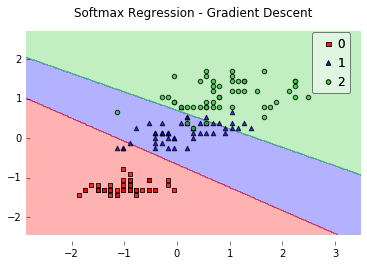

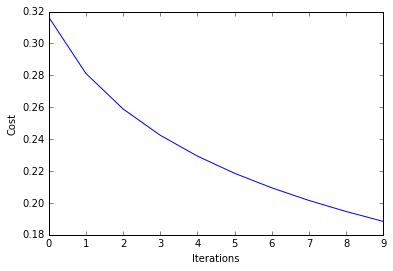

In [14]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

lr = SoftmaxRegression(eta=0.01, epochs=10, minibatches=1, random_seed=0)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Gradient Descent')
plt.show()

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Continue training for another 800 epochs by calling the `fit` method with `init_params=False`.

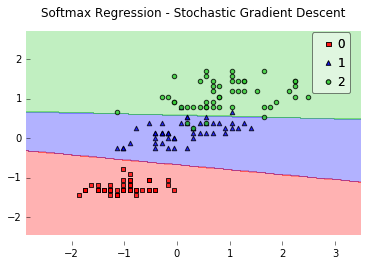

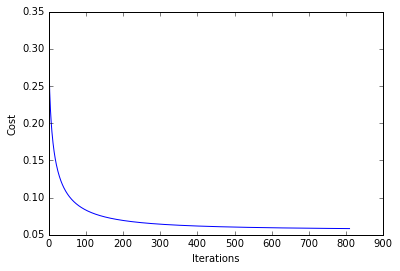

In [15]:
lr.epochs = 800

lr.fit(X, y, init_params=False)

plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Stochastic Gradient Descent')
plt.show()

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### Predicting Class Labels

In [16]:
y_pred = lr.predict(X)
print('Last 3 Class Labels: %s' % y_pred[-3:])

Last 3 Class Labels: [2 2 2]


### Predicting Class Probabilities

In [17]:
y_pred = lr.predict_proba(X)
print('Last 3 Class Labels:\n %s' % y_pred[-3:])

Last 3 Class Labels:
 [[  1.22579350e-09   1.22074818e-02   9.87792517e-01]
 [  1.84962350e-12   3.99742930e-04   9.99600257e-01]
 [  3.10919973e-07   1.37047172e-01   8.62952517e-01]]


## Example 2 - Stochastic Gradient Descent

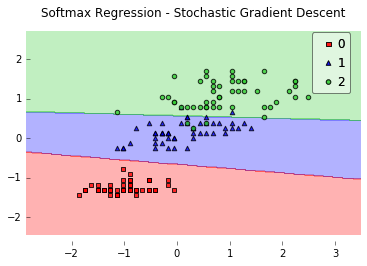

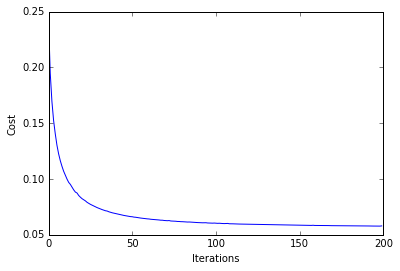

In [18]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import SoftmaxRegression
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

lr = SoftmaxRegression(eta=0.05, epochs=200, minibatches=len(y), random_seed=0)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Stochastic Gradient Descent')
plt.show()

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()